<a href="https://colab.research.google.com/github/adarshcsb66/Data-Science-Projects/blob/master/AdarshKumar_FDS_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.datasets import load_boston

In [0]:
X, y = load_boston(return_X_y=True)
house_price = load_boston()
df = pd.DataFrame(house_price.data,
columns=house_price.feature_names)
df['PRICE'] = house_price.target
df_train ,df_test = train_test_split(df,test_size=0.3)

In [0]:
#FEATURES:
# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

In [75]:
# Data Exploration:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<BarContainer object of 13 artists>

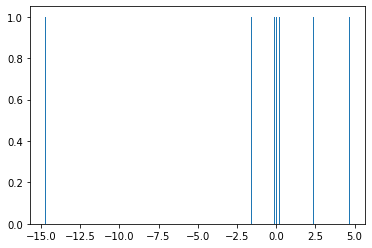

In [76]:
#TASK 1:
ols=linear_model.LinearRegression()
a=df_train.loc[:,'CRIM':'LSTAT']
b=df_train.PRICE
a1=df_test.loc[:,'CRIM':'LSTAT']
b1=df_test.PRICE
ols.fit(a,b)
coefficients=ols.coef_
plt.bar(coefficients,1,width=0.03)

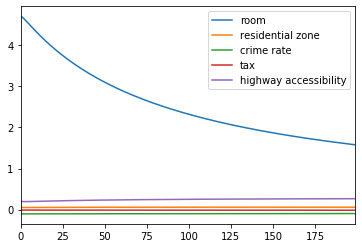

In [77]:
#TASK 2:
room=[]
residential_zone=[]
highway_access=[]
crime_rate=[]
highway=[]
tax=[]
for i in range(200):
    ridge=linear_model.Ridge(alpha=i+1)
    ridge.fit(a,b)
    coeff=ridge.coef_
    room.append(coeff[5])
    residential_zone.append(coeff[1])
    crime_rate.append(coeff[0])
    tax.append(coeff[9])
    highway.append(coeff[8])
dd=pd.DataFrame({'room':room,'residential zone':residential_zone,'crime rate':crime_rate,'tax':tax,'highway accessibility':highway})
line=dd.plot.line()

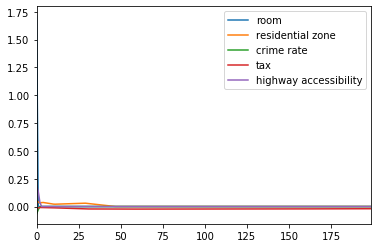

In [78]:
# TASK 3:
room=[]
residential_zone=[]
highway_access=[]
crime_rate=[]
highway=[]
tax=[]
for i in range(200):
    ridge=linear_model.Lasso(alpha=i+1)
    ridge.fit(a,b)
    coeff=ridge.coef_
    room.append(coeff[5])
    residential_zone.append(coeff[1])
    crime_rate.append(coeff[0])
    tax.append(coeff[9])
    highway.append(coeff[8])
dd=pd.DataFrame({'room':room,'residential zone':residential_zone,'crime rate':crime_rate,'tax':tax,'highway accessibility':highway})
line=dd.plot.line()

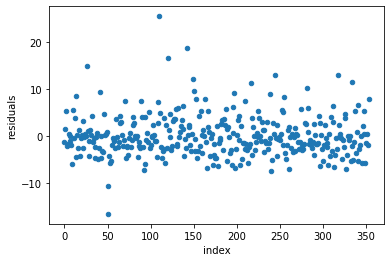

In [79]:
# TASK 4:
#
# Part 1:OLS residuals
#
ols=linear_model.LinearRegression()
ols.fit(a,b)
residuals=[]
coeffs=ols.coef_
for i in a.index:
    predicted=0
    k=0
    for j in a.columns:
        predicted+=df[j][i]*coeffs[k]
        k=k+1
    residuals.append(b[i]-predicted-ols.intercept_)
index=[]
for i in range(len(a.index)):
    index.append(i)    
residual_df=pd.DataFrame({'residuals':residuals,'index':index})        
residual_df.plot.scatter(y='residuals',x='index')

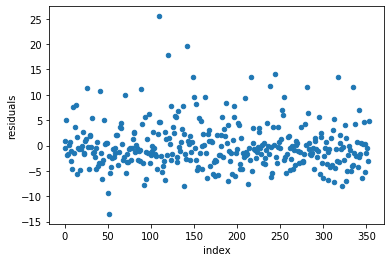

In [80]:
# Part 2:Ridge residuals
#
# alpha=50
ols=linear_model.Ridge(alpha=50)
ols.fit(a,b)
residuals=[]
coeffs=ols.coef_
for i in a.index:
    predicted=0
    k=0
    for j in a.columns:
        predicted+=df[j][i]*coeffs[k]
        k=k+1
    residuals.append(b[i]-predicted-ols.intercept_)
index=[]
for i in range(len(a.index)):
    index.append(i)    
residual_df=pd.DataFrame({'residuals':residuals,'index':index})        
residual_df.plot.scatter(y='residuals',x='index')

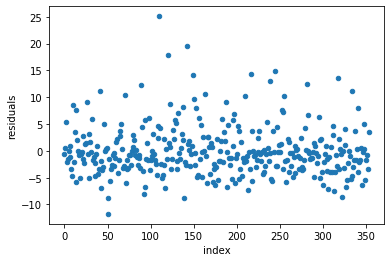

In [81]:
#alpha=100
ols=linear_model.Ridge(alpha=100)
ols.fit(a,b)
residuals=[]
coeffs=ols.coef_
for i in a.index:
    predicted=0
    k=0
    for j in a.columns:
        predicted+=df[j][i]*coeffs[k]
        k=k+1
    residuals.append(b[i]-predicted-ols.intercept_)
index=[]
for i in range(len(a.index)):
    index.append(i)    
residual_df=pd.DataFrame({'residuals':residuals,'index':index})        
residual_df.plot.scatter(y='residuals',x='index')

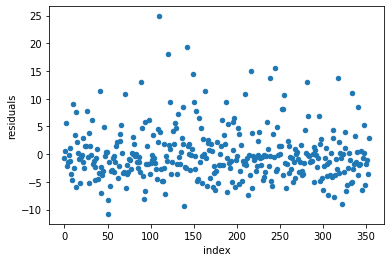

In [82]:
#aplha=150
ols=linear_model.Ridge(alpha=150)
ols.fit(a,b)
residuals=[]
coeffs=ols.coef_
for i in a.index:
    predicted=0
    k=0
    for j in a.columns:
        predicted+=df[j][i]*coeffs[k]
        k=k+1
    residuals.append(b[i]-predicted-ols.intercept_)
index=[]
for i in range(len(a.index)):
    index.append(i)    
residual_df=pd.DataFrame({'residuals':residuals,'index':index})        
residual_df.plot.scatter(y='residuals',x='index')

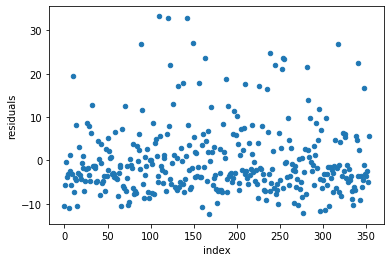

In [83]:
# Part 3:Lasso residuals
#
#alpha=50
ols=linear_model.Lasso(alpha=50)
ols.fit(a,b)
residuals=[]
coeffs=ols.coef_
for i in a.index:
    predicted=0
    k=0
    for j in a.columns:
        predicted+=df[j][i]*coeffs[k]
        k=k+1
    residuals.append(b[i]-predicted-ols.intercept_)
index=[]
for i in range(len(a.index)):
    index.append(i)    
residual_df=pd.DataFrame({'residuals':residuals,'index':index})        
residual_df.plot.scatter(y='residuals',x='index') 

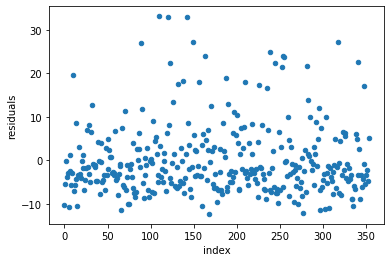

In [84]:
#alpha=100
ols=linear_model.Lasso(alpha=100)
ols.fit(a,b)
residuals=[]
coeffs=ols.coef_
for i in a.index:
    predicted=0
    k=0
    for j in a.columns:
        predicted+=df[j][i]*coeffs[k]
        k=k+1
    residuals.append(b[i]-predicted-ols.intercept_)
index=[]
for i in range(len(a.index)):
    index.append(i)    
residual_df=pd.DataFrame({'residuals':residuals,'index':index})        
residual_df.plot.scatter(y='residuals',x='index')

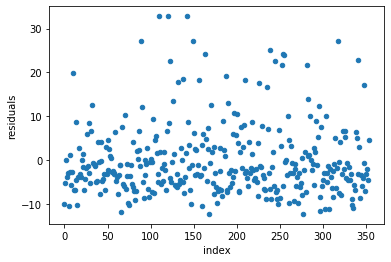

In [85]:
#aplha=150
ols=linear_model.Lasso(alpha=150)
ols.fit(a,b)
residuals=[]
coeffs=ols.coef_
for i in a.index:
    predicted=0
    k=0
    for j in a.columns:
        predicted+=df[j][i]*coeffs[k]
        k=k+1
    residuals.append(b[i]-predicted-ols.intercept_)
index=[]
for i in range(len(a.index)):
    index.append(i)    
residual_df=pd.DataFrame({'residuals':residuals,'index':index})        
residual_df.plot.scatter(y='residuals',x='index')

In [86]:
#Task 5:
#Training error
ols_train_error=[]
ols=linear_model.LinearRegression()
ols.fit(a,b)
predicted_values=ols.predict(a)
k=0
for i in df_train['PRICE']:
  ols_train_error.append(i-predicted_values[k])
  k=k+1
mean_error_ols=np.sum(ols_train_error)/len(ols_train_error)
print(mean_error_ols)

ridge_train_error=[]
for i in range(200):
  ridge=linear_model.Ridge(alpha=i+1)  
  ridge.fit(a,b)
  predicted=ridge.predict(a)
  actual=b
  diff=actual-predicted
  error_term=np.sum(diff)/len(diff)
  ridge_train_error.append(error_term)
mean_error_ridge=np.sum(ridge_train_error)/len(ridge_train_error)  
print(mean_error_ridge)

lasso_train_error=[]
for i in range(200):
  lasso=linear_model.Lasso(alpha=i+1)  
  lasso.fit(a,b)
  predicted=lasso.predict(a)
  actual=b
  diff=actual-predicted
  error_term=np.sum(diff)/len(diff)
  lasso_train_error.append(error_term)
mean_error_lasso=np.sum(lasso_train_error)/len(lasso_train_error)  
print(mean_error_lasso)
ind=[]
for i in range(200):
  ind.append(i+1)

-3.251636248393679e-15
-8.841640539613674e-16
4.825267617986669e-16


-0.23470659237634559
-0.3601553994605963
-0.6429818107803359


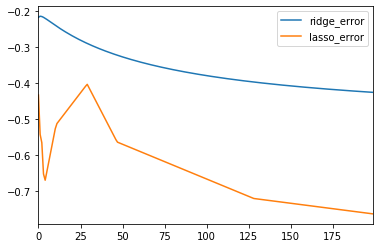

In [89]:
#Test Error:
ols_test_error=[]
ols=linear_model.LinearRegression()
ols.fit(a,b)
predicted_values=ols.predict(a1)
k=0
for i in df_test['PRICE']:
  ols_test_error.append(i-predicted_values[k])
  k=k+1
mean_error_ols_test=np.sum(ols_test_error)/len(ols_test_error)
print(mean_error_ols_test)

ridge_test_error=[]
for i in range(200):
  ridge=linear_model.Ridge(alpha=i+1)  
  ridge.fit(a,b)
  predicted=ridge.predict(a1)
  actual=b1
  diff=actual-predicted
  error_term=np.sum(diff)/len(diff)
  ridge_test_error.append(error_term)
mean_error_ridge_test=np.sum(ridge_test_error)/len(ridge_test_error)  
print(mean_error_ridge_test) 

lasso_test_error=[]
for i in range(200):
  lasso=linear_model.Lasso(alpha=i+1)  
  lasso.fit(a,b)
  predicted=lasso.predict(a1)
  actual=b1
  diff=actual-predicted
  error_term=np.sum(diff)/len(diff)
  lasso_test_error.append(error_term)
mean_error_lasso_test=np.sum(lasso_test_error)/len(lasso_test_error)  
print(mean_error_lasso_test)
error_ridge=pd.DataFrame({'ridge_error':ridge_test_error,'lasso_error':lasso_test_error})
error_ridge.plot.line()

In [88]:
error_df=pd.DataFrame({'OLS train error':[mean_error_ols],'OLS test error':[mean_error_ols_test],
                       'Ridge train error':[mean_error_ridge],'Ridge test error':[mean_error_ridge_test],
                       'Lasso train error':[mean_error_lasso],'Lasso test error':[mean_error_lasso_test]})
error_df

,OLS train error,OLS test error,Ridge train error,Ridge test error,Lasso train error,Lasso test error
0,-3.251636e-15,-0.234707,-8.841641e-16,-0.360155,4.825268e-16,-0.642982
